In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Activation, Dropout
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import Input, Model

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


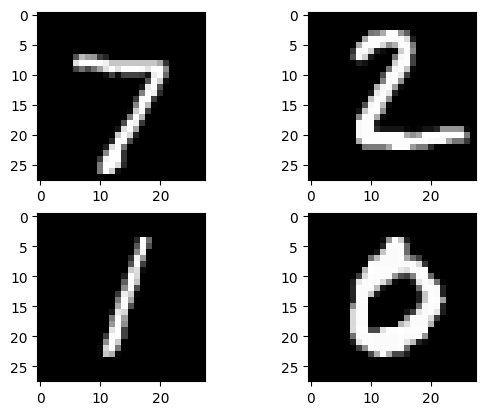

In [3]:
# первые 4 изображения тестового набора
plt.subplot(2,2,1)
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(x_test[1].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(x_test[2].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.imshow(x_test[3].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# изменение размера входных данных
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

count_classes = 10

y_train = np_utils.to_categorical(y_train, count_classes)
y_test = np_utils.to_categorical(y_test, count_classes)

In [10]:
# модель
np.random.seed(123)

CLASSES = 10
HIDDEN = 128
EPOCHS = 15
BATCH_SIZE = 256
DROPOUT = 0.45
VALIDATION_SPLIT = 0.2

model = Sequential()

model.add(Dense(HIDDEN, input_shape = (784, )))
model.add(Activation('relu'))

model.add(Dropout(DROPOUT))

model.add(Dense(HIDDEN))
model.add(Activation('relu'))

model.add(Dropout(DROPOUT))

model.add(Dense(CLASSES))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [11]:
# обучение модели
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
result = model.fit(x_train, y_train,
                    batch_size = BATCH_SIZE, epochs = EPOCHS,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/15
188/188 [==============================] - 2s 5ms/step - loss: 0.7678 - accuracy: 0.7542 - val_loss: 0.2436 - val_accuracy: 0.9278
Epoch 2/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8973 - val_loss: 0.1839 - val_accuracy: 0.9460
Epoch 3/15
188/188 [==============================] - 1s 5ms/step - loss: 0.2828 - accuracy: 0.9170 - val_loss: 0.1550 - val_accuracy: 0.9551
Epoch 4/15
188/188 [==============================] - 1s 6ms/step - loss: 0.2387 - accuracy: 0.9307 - val_loss: 0.1366 - val_accuracy: 0.9600
Epoch 5/15
188/188 [==============================] - 1s 5ms/step - loss: 0.2123 - accuracy: 0.9386 - val_loss: 0.1244 - val_accuracy: 0.9650
Epoch 6/15
188/188 [==============================] - 1s 4ms/step - loss: 0.1983 - accuracy: 0.9426 - val_loss: 0.1158 - val_accuracy: 0.9676
Epoch 7/15
188/188 [==============================] - 1s 4ms/step - loss: 0.1791 - accuracy: 0.9479 - val_loss: 0.1124 - val_accuracy: 0.9678
Epoch 

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0935315266251564
Test accuracy: 0.9735999703407288


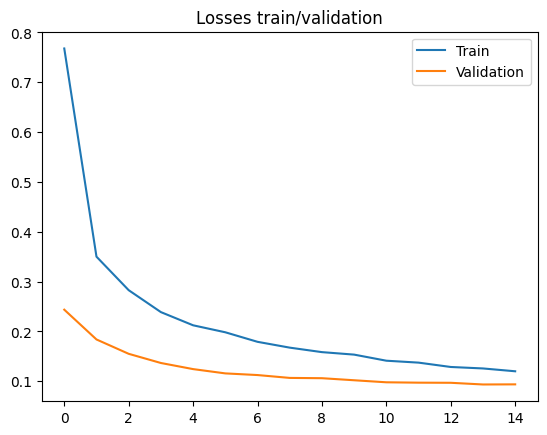

In [13]:
plt.title("Losses train/validation")
plt.plot(result.history["loss"], label = "Train")
plt.plot(result.history["val_loss"], label = "Validation")
plt.legend()
plt.show()

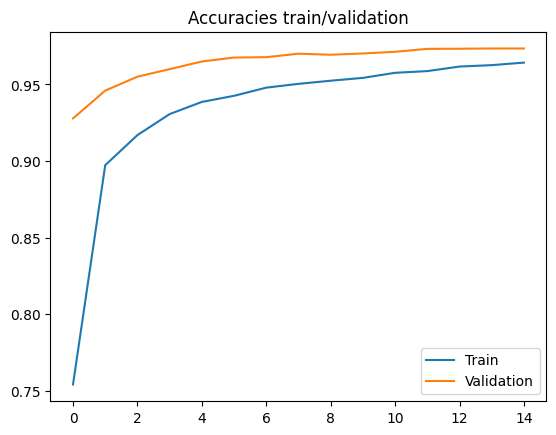

In [14]:
plt.title("Accuracies train/validation")
plt.plot(result.history["accuracy"], label = "Train")
plt.plot(result.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [15]:
print('\n# Генерируем прогнозы для 4 образцов')
predictions = model.predict(x_test[:4])
print(predictions)
print(y_test[:4])


# Генерируем прогнозы для 4 образцов
1/1 [==============================] - 0s 72ms/step
[[1.1391298e-07 3.6074610e-07 3.0684816e-05 2.3828836e-05 1.6805755e-10
  4.3362417e-07 4.4616403e-12 9.9993432e-01 7.8088087e-09 1.0199181e-05]
 [2.3031934e-11 5.8850590e-05 9.9991918e-01 2.1933240e-05 1.0051735e-12
  7.3435649e-09 9.8149699e-10 1.7834495e-08 4.0838888e-09 1.1984649e-14]
 [1.1126887e-07 9.9967384e-01 1.2251506e-04 5.2236132e-06 1.2623538e-05
  8.9057630e-06 8.9938549e-06 1.4434716e-04 2.2701337e-05 7.4510166e-07]
 [9.9980778e-01 2.7413790e-08 4.5356501e-05 8.5081967e-07 1.5316375e-06
  1.8051542e-06 1.2034132e-04 2.1527359e-05 2.7714051e-07 5.1760424e-07]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Обработка датасета MNIST с помощью ResNet50

In [16]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Исходный размер данных
print("Old shapes: ", X_train.shape, Y_train.shape)

# Добавляем дополнительную ось
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = np.repeat(X_train, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Меняем размер осей на 32 вместо 28
X_train = tf.image.resize(X_train, [32,32]) 
X_test = tf.image.resize(X_test, [32,32])

# Преобразование в двоичную матрицу 
num_classes = 10
Y_train = np_utils.to_categorical(Y_train , num_classes)
Y_test = np_utils.to_categorical(Y_test , num_classes)

# Новый размер данных
print("New shapes: ", X_train.shape, Y_train.shape)

Old shapes:  (60000, 28, 28) (60000,)
New shapes:  (60000, 32, 32, 3) (60000, 10)


In [22]:
# входной слой
input = Input(shape=(32,32,3))

modelR = ResNet50(weights = 'imagenet',
                  include_top = False, 
                  input_tensor = input)

# сжатие карт признаков GlobalAveragePooling2D()
gap = GlobalAveragePooling2D()(modelR.output)
output_aver = Dense(10, activation = 'softmax', use_bias = True)(gap)
model_ResNet50 = Model(modelR.input, output_aver)

# сжатие карт признаков GlobalMaxPooling2D()
gmp = GlobalMaxPooling2D()(modelR.output)
output_max = Dense(10, activation = 'softmax', use_bias = True)(gmp)
model2_ResNet50 = Model(modelR.input, output_max)

In [23]:
BATCH_SIZE_ResNet50 = 256
EPOCHS_ResNet50 = 10
VALIDATION_SPLIT_ResNet50 = 0.2

model_ResNet50.compile(loss = 'categorical_crossentropy',
                       optimizer = 'adam',
                       metrics = ['accuracy'])

result2 = model_ResNet50.fit(X_train, Y_train,
                             batch_size = BATCH_SIZE_ResNet50, 
                             epochs = EPOCHS_ResNet50,
                             validation_split = VALIDATION_SPLIT_ResNet50)

Epoch 1/10
188/188 [==============================] - 68s 118ms/step - loss: 0.1399 - accuracy: 0.9628 - val_loss: 5.6389 - val_accuracy: 0.1060
Epoch 2/10
188/188 [==============================] - 19s 99ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 5.3279 - val_accuracy: 0.1060
Epoch 3/10
188/188 [==============================] - 19s 99ms/step - loss: 0.0243 - accuracy: 0.9938 - val_loss: 5.3450 - val_accuracy: 0.2123
Epoch 4/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.5282 - val_accuracy: 0.8352
Epoch 5/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0806 - val_accuracy: 0.9790
Epoch 6/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 7/10
188/188 [==============================] - 18s 98ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0699 - val_accuracy

In [24]:
score2 = model_ResNet50.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.03280264139175415
Test accuracy: 0.9925000071525574


In [25]:
print('\n# Генерируем прогнозы для 4 образцов')
predictions2 = model_ResNet50.predict(X_test[:4])
print(predictions2)
print(Y_test[:4])


# Генерируем прогнозы для 4 образцов
1/1 [==============================] - 1s 1s/step
[[9.69064964e-20 4.92078327e-15 1.64374342e-20 8.50203763e-20
  1.35118354e-20 7.35441315e-22 2.36493501e-18 1.00000000e+00
  5.52076497e-20 4.88859705e-17]
 [4.91189416e-11 9.42554507e-11 1.00000000e+00 4.99970787e-10
  1.03528297e-09 1.43576288e-11 2.71340922e-10 1.52038293e-08
  1.52133584e-10 4.01419148e-10]
 [4.46880116e-10 9.99999642e-01 1.08903156e-11 1.13185052e-10
  5.45291312e-10 4.25546626e-10 1.48638692e-08 3.77280855e-07
  8.42830750e-10 3.70753532e-11]
 [9.99999762e-01 7.51129559e-09 3.71840359e-09 3.82641163e-09
  5.70744074e-09 8.74880099e-11 1.83252510e-07 7.44840412e-10
  1.58713540e-08 1.98545336e-09]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


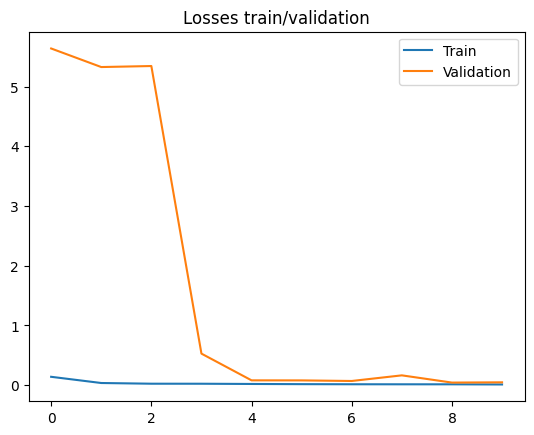

In [26]:
plt.title("Losses train/validation")
plt.plot(result2.history["loss"], label = "Train")
plt.plot(result2.history["val_loss"], label = "Validation")
plt.legend()
plt.show()

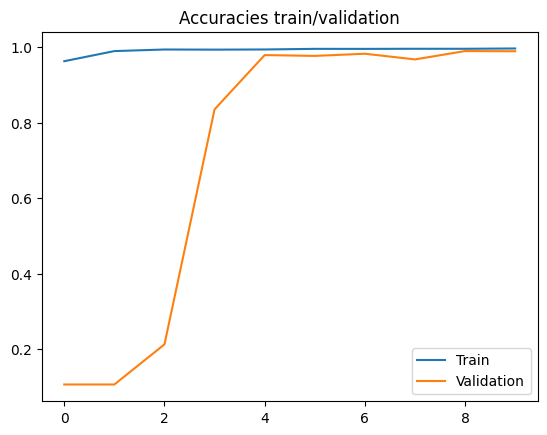

In [27]:
plt.title("Accuracies train/validation")
plt.plot(result2.history["accuracy"], label = "Train")
plt.plot(result2.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [28]:
# аналогичная модель, но с другим пулингом
model2_ResNet50.compile(loss = 'categorical_crossentropy',
                       optimizer = 'adam',
                       metrics = ['accuracy'])

result3 = model2_ResNet50.fit(X_train, Y_train,
                             batch_size = BATCH_SIZE_ResNet50, 
                             epochs = EPOCHS_ResNet50,
                             validation_split = VALIDATION_SPLIT_ResNet50)

Epoch 1/10
188/188 [==============================] - 56s 107ms/step - loss: 0.0537 - accuracy: 0.9864 - val_loss: 4.1949 - val_accuracy: 0.8933
Epoch 2/10
188/188 [==============================] - 19s 101ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.0770 - val_accuracy: 0.9858
Epoch 3/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.0739 - val_accuracy: 0.9840
Epoch 4/10
188/188 [==============================] - 18s 96ms/step - loss: 0.0186 - accuracy: 0.9951 - val_loss: 0.1026 - val_accuracy: 0.9793
Epoch 5/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.2030 - val_accuracy: 0.9723
Epoch 6/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0670 - val_accuracy: 0.9858
Epoch 7/10
188/188 [==============================] - 18s 97ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0515 - val_accurac

In [29]:
score3 = model2_ResNet50.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])

Test loss: 0.027778932824730873
Test accuracy: 0.9936000108718872


In [30]:
print('\n# Генерируем прогнозы для 4 образцов')
predictions3 = model2_ResNet50.predict(X_test[:4])
print(predictions3)
print(Y_test[:4])


# Генерируем прогнозы для 4 образцов
1/1 [==============================] - 1s 892ms/step
[[7.7358814e-12 1.4284635e-12 1.0822138e-10 6.1370992e-11 1.7094423e-11
  9.2176882e-12 2.5735219e-13 1.0000000e+00 3.5272756e-13 2.8330971e-11]
 [7.8226362e-16 4.8344622e-14 1.0000000e+00 2.6348400e-15 1.0530811e-14
  8.4754328e-17 7.4159674e-15 1.0531488e-15 2.9432346e-16 4.7128281e-17]
 [1.1547846e-14 1.0000000e+00 2.7306051e-17 1.6843189e-17 1.0940368e-11
  3.6816292e-24 3.4569626e-12 5.7124504e-17 9.9225323e-21 2.3694953e-18]
 [9.9999583e-01 1.8260463e-08 7.2017123e-08 3.2293912e-07 7.4067145e-07
  3.4354812e-08 2.0079024e-06 1.4403021e-07 2.3931375e-07 5.4240172e-07]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


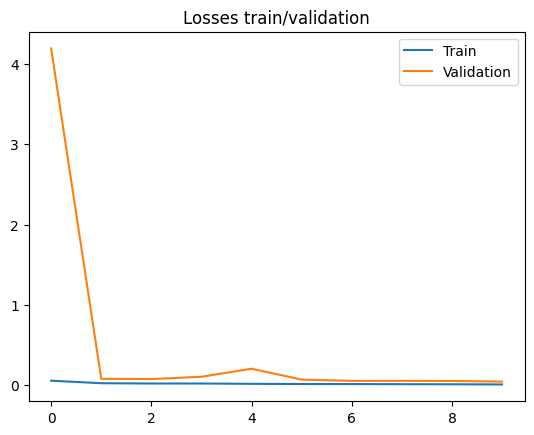

In [31]:
plt.title("Losses train/validation")
plt.plot(result3.history["loss"], label = "Train")
plt.plot(result3.history["val_loss"], label = "Validation")
plt.legend()
plt.show()

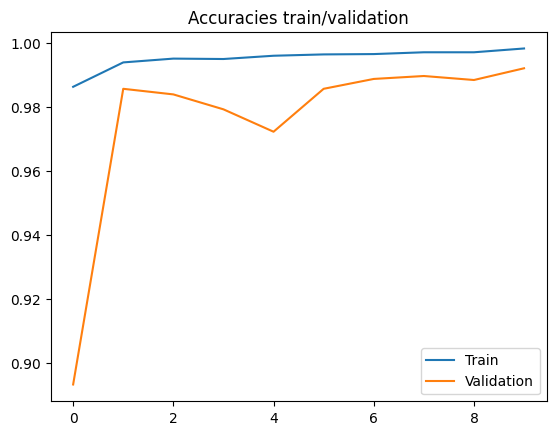

In [32]:
plt.title("Accuracies train/validation")
plt.plot(result3.history["accuracy"], label = "Train")
plt.plot(result3.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

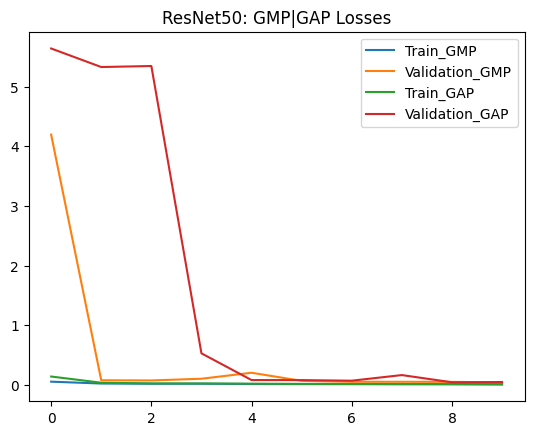

In [34]:
# сравнение ResNet50 с разными пулингами
# ошибка
plt.title("ResNet50: GMP|GAP Losses")
plt.plot(result3.history["loss"], label = "Train_GMP")
plt.plot(result3.history["val_loss"], label = "Validation_GMP")
plt.plot(result2.history["loss"], label = "Train_GAP")
plt.plot(result2.history["val_loss"], label = "Validation_GAP")
plt.legend()
plt.show()

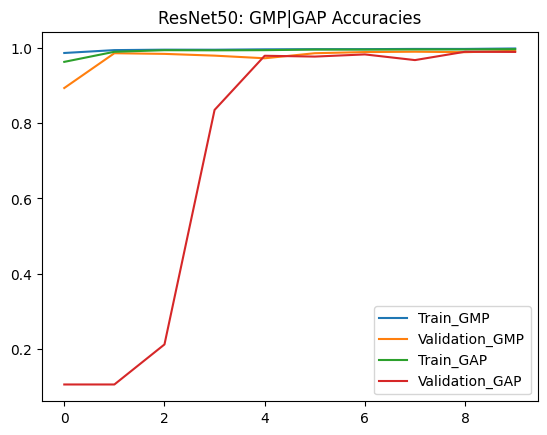

In [35]:
# сравнение ResNet50 с разными пулингами
# точность
plt.title("ResNet50: GMP|GAP Accuracies")
plt.plot(result3.history["accuracy"], label = "Train_GMP")
plt.plot(result3.history["val_accuracy"], label = "Validation_GMP")
plt.plot(result2.history["accuracy"], label = "Train_GAP")
plt.plot(result2.history["val_accuracy"], label = "Validation_GAP")
plt.legend()
plt.show()

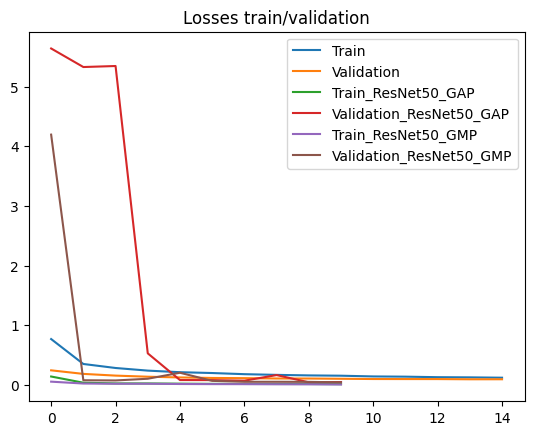

In [38]:
# сравнение всех моделей
# ошибка
plt.title("Losses train/validation")
plt.plot(result.history["loss"], label = "Train")
plt.plot(result.history["val_loss"], label = "Validation")
plt.plot(result2.history["loss"], label = "Train_ResNet50_GAP")
plt.plot(result2.history["val_loss"], label = "Validation_ResNet50_GAP")
plt.plot(result3.history["loss"], label = "Train_ResNet50_GMP")
plt.plot(result3.history["val_loss"], label = "Validation_ResNet50_GMP")
plt.legend()
plt.show()

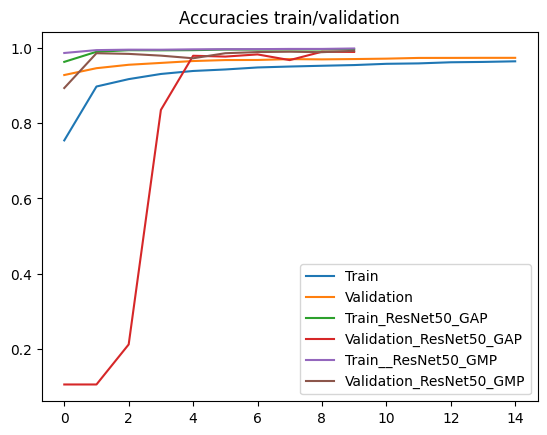

In [39]:
# сравнение всех моделей
# точность
plt.title("Accuracies train/validation")
plt.plot(result.history["accuracy"], label = "Train")
plt.plot(result.history["val_accuracy"], label = "Validation")
plt.plot(result2.history["accuracy"], label = "Train_ResNet50_GAP")
plt.plot(result2.history["val_accuracy"], label = "Validation_ResNet50_GAP")
plt.plot(result3.history["accuracy"], label = "Train__ResNet50_GMP")
plt.plot(result3.history["val_accuracy"], label = "Validation_ResNet50_GMP")
plt.legend()
plt.show()